<a href="https://colab.research.google.com/github/vaibhuxx/Stock-Market-Prediction/blob/main/StockMarketPredicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Forecasting


Stock Market Prediction and forecasting using Stacked LSTM

IMPORT LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler


LOAD DATA

In [ ]:
data = pd.read_csv("/Stock_2018.csv")

In [ ]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


SORT WITH DATE

In [ ]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


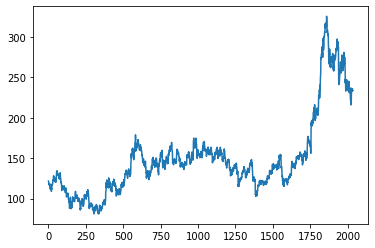

In [ ]:
plt.plot(df['Close'])

In [ ]:
df1=df['Close']

1. PREPARE DATA


LSTM are sensitive to scale of the data, therefore applying MinMax scaler

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

splitting dataset into train and test split

In [ ]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1424, 611)

convert an array of values into a dataset matrix

In [ ]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX), np.array(dataY)

reshape into X=t,t+1,t+2,t+3 and Y=t+4

In [ ]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(x_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [ ]:
print(x_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [ ]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

1. MODEL BUILDING

creating the stacked LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 11s 256ms/step - loss: 0.0105 - val_loss: 0.0011
Epoch 2/60
19/19 [==============================] - 3s 182ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 3/60
19/19 [==============================] - 3s 179ms/step - loss: 9.1493e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 3s 181ms/step - loss: 8.1705e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 3s 182ms/step - loss: 7.8940e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 3s 180ms/step - loss: 7.8832e-04 - val_loss: 0.0010
Epoch 7/60
19/19 [==============================] - 3s 180ms/step - loss: 7.6174e-04 - val_loss: 9.8930e-04
Epoch 8/60
19/19 [==============================] - 3s 180ms/step - loss: 7.6266e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 3s 180ms/step - loss: 7.3777e-04 - val_loss: 0.0010
Epoch 10/60
19/19 [==============================] - 3s 179ms/step 

Predition and Performance metrices

In [ ]:
test_predict=model.predict(x_test)

16/16 [==============================] - 3s 44ms/step


Transform back to orignal form

In [ ]:
test_predict1=scaler.inverse_transform(test_predict)

In [ ]:
test_predict1

array([[141.5975  ],
       [141.74974 ],
       [140.84769 ],
       [138.1851  ],
       [136.46823 ],
       [135.98978 ],
       [137.26753 ],
       [138.95416 ],
       [139.38489 ],
       [138.90129 ],
       [138.50171 ],
       [139.59349 ],
       [140.47293 ],
       [142.07977 ],
       [144.29784 ],
       [142.39246 ],
       [139.78496 ],
       [139.27039 ],
       [140.00864 ],
       [145.08728 ],
       [149.71205 ],
       [151.85513 ],
       [151.905   ],
       [149.55234 ],
       [149.12648 ],
       [149.05692 ],
       [149.66615 ],
       [151.47006 ],
       [152.26505 ],
       [152.14545 ],
       [152.33339 ],
       [151.114   ],
       [147.85239 ],
       [142.18932 ],
       [138.75311 ],
       [137.96002 ],
       [138.3761  ],
       [137.73163 ],
       [135.38411 ],
       [131.57925 ],
       [128.91089 ],
       [127.74659 ],
       [125.900444],
       [125.158325],
       [123.30031 ],
       [120.760864],
       [119.96462 ],
       [119.7

Calculate RMSE performance metrics

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytest,test_predict))

0.036318261866018255